### FORECASTING MODEL FOR PREDICTING THE PRICES OF BINANCE COIN

#### Let's start with some necessary imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style(style='whitegrid')

In [2]:
# Loading the dataframe into our notebook
binance_df = pd.read_csv('Binance Coin - Historic Data.csv')

#### Let's get a feel of the data that we'll be working with <br>
Binance coin is cryptocurrency by Binance. Binance is a cryptocurrency exchange that  provides a platform for trading various cryptocurrencies. It was founded in 2017 and is domiciled in the  Cayman Islands. Binance is currently the largest exchange in the world in terms of the daily trading  volume. Binance was founded by Changpeng Zhao.  
Contains several parameters of daily prices of Litecoin. The data starts from 9-Nov 2017. 

In [3]:
binance_df.head()

,Date,Price(in dollars),Open,High,Low,Vol.,Change%
0,"Jul 27, 2021",303.29,304.31,307.62,298.53,2.26M,-0.33
1,"Jul 26, 2021",304.31,302.60,327.62,301.19,2.86M,0.58
2,"Jul 25, 2021",302.57,302.55,303.09,292.85,1.25M,-0.19
3,"Jul 24, 2021",303.15,298.91,305.01,296.16,1.81M,1.42
4,"Jul 23, 2021",298.89,293.51,301.15,281.68,1.98M,1.83


In [4]:
binance_df.head()

,Date,Price(in dollars),Open,High,Low,Vol.,Change%
0,"Jul 27, 2021",303.29,304.31,307.62,298.53,2.26M,-0.33
1,"Jul 26, 2021",304.31,302.60,327.62,301.19,2.86M,0.58
2,"Jul 25, 2021",302.57,302.55,303.09,292.85,1.25M,-0.19
3,"Jul 24, 2021",303.15,298.91,305.01,296.16,1.81M,1.42
4,"Jul 23, 2021",298.89,293.51,301.15,281.68,1.98M,1.83


In [5]:
binance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1357 entries, 0 to 1356
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1357 non-null   object 
 1   Price(in dollars)  1357 non-null   float64
 2   Open               1357 non-null   float64
 3   High               1357 non-null   float64
 4   Low                1357 non-null   float64
 5   Vol.               1357 non-null   object 
 6   Change%            1357 non-null   float64
dtypes: float64(5), object(2)
memory usage: 74.3+ KB


In [6]:
binance_df.describe()

,Price(in dollars),Open,High,Low,Change%
count,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000
mean,60.086728,59.867833,62.954245,56.603434,0.593206
std,121.888722,121.715871,128.359292,114.574371,6.841432
min,1.490000,1.490000,1.580000,1.340000,-44.080000
25%,12.090000,12.080000,12.440000,11.320000,-2.410000
50%,17.110000,17.080000,17.540000,16.440000,0.160000
75%,28.800000,28.770000,29.450000,27.830000,3.050000
max,676.560000,676.250000,690.870000,631.440000,69.990000


In [7]:
# Checking for null values
binance_df.isnull().sum()

Date                 0
Price(in dollars)    0
Open                 0
High                 0
Low                  0
Vol.                 0
Change%              0
dtype: int64

#### We'll start by cleaning and processing our data
First, we'll convert the dates into a timestamp

In [8]:
from datetime import datetime
def date_function(d):
    return datetime.strptime(d, '%b %d, %Y').strftime('%Y-%m-%d')
binance_df['Date'] = binance_df['Date'].apply(date_function)
binance_df['Date']

0       2021-07-27
1       2021-07-26
2       2021-07-25
3       2021-07-24
4       2021-07-23
           ...    
1352    2017-11-13
1353    2017-11-12
1354    2017-11-11
1355    2017-11-10
1356    2017-11-09
Name: Date, Length: 1357, dtype: object

In [9]:
binance_df['Date'] = pd.to_datetime(binance_df['Date'], format = '%Y-%m-%d')

Now we'll convert the volume column into float data type so we can work with it. We'll use a function to do this.

In [10]:
binance_df['Vol.']

0         2.26M
1         2.86M
2         1.25M
3         1.81M
4         1.98M
         ...   
1352    166.01K
1353    456.48K
1354    256.71K
1355    483.23K
1356    283.35K
Name: Vol., Length: 1357, dtype: object

In [11]:
def volume_int(x):
    if 'M' in x:
        y = float(x[:-1])*1000000
    elif 'K' in x:
        y = float(x[:-1])*1000
    else:
        y = 0
    return y

In [12]:
binance_df['Volume'] = binance_df['Vol.'].apply(volume_int)

In [13]:
binance_df[['Volume', 'Vol.']]

,Volume,Vol.
0,2260000.0,2.26M
1,2860000.0,2.86M
2,1250000.0,1.25M
3,1810000.0,1.81M
4,1980000.0,1.98M
...,...,...
1352,166010.0,166.01K
1353,456480.0,456.48K
1354,256710.0,256.71K
1355,483230.0,483.23K


In [14]:
binance_df['Volume'].max()

24310000.0

In [15]:
binance_df['Volume'].min()

0.0

In [16]:
binance_df[binance_df['Volume']==0.0][['Volume', 'Vol.']]

,Volume,Vol.
1264,0.0,-


In [17]:
binance_df.iloc[1264]

Date                 2018-02-09 00:00:00
Price(in dollars)                   8.28
Open                                8.28
High                                8.28
Low                                 8.28
Vol.                                   -
Change%                              0.0
Volume                               0.0
Name: 1264, dtype: object

In [18]:
binance_df.columns

Index(['Date', 'Price(in dollars)', 'Open', 'High', 'Low', 'Vol.', 'Change%',
       'Volume'],
      dtype='object')

In [19]:
# We no longer need the Vol. column so we'll delete it
del binance_df['Vol.']

Moving Average is a very important metric when it comes to price prediction.<br> As defined by investopedia,<br> "In statistics, a moving average is a calculation used to analyze data points by creating a series of averages of different subsets of the full data set. In finance, a moving average (MA) is a stock indicator that is commonly used in technical analysis. The reason for calculating the moving average of a stock is to help smooth out the price data by creating a constantly updated average price.
By calculating the moving average, the impacts of random, short-term fluctuations on the price of a stock over a specified time-frame are mitigated." <br>
We'll use the rolling function for this.

In [20]:
moving_avg = (binance_df['Price(in dollars)'].rolling(window=11).sum()-binance_df['Price(in dollars)'].rolling(window=1).sum())/10
moving_avg.head(20)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
10    294.606
11    294.308
12    294.161
13    295.462
14    296.092
15    297.101
16    299.365
17    302.245
18    307.393
19    311.023
Name: Price(in dollars), dtype: float64

In [21]:
binance_df['5D_Avg'] = (binance_df['Price(in dollars)'].rolling(window=6).sum()-binance_df['Price(in dollars)'].rolling(window=1).sum())/6

In [22]:
binance_df['10D_Avg'] = moving_avg

In [23]:
binance_df.head(20)

,Date,Price(in dollars),Open,High,Low,Change%,Volume,5D_Avg,10D_Avg
0,2021-07-27,303.29,304.31,307.62,298.53,-0.33,2260000.0,NaN,NaN
1,2021-07-26,304.31,302.60,327.62,301.19,0.58,2860000.0,NaN,NaN
2,2021-07-25,302.57,302.55,303.09,292.85,-0.19,1250000.0,NaN,NaN
3,2021-07-24,303.15,298.91,305.01,296.16,1.42,1810000.0,NaN,NaN
4,2021-07-23,298.89,293.51,301.15,281.68,1.83,1980000.0,NaN,NaN
5,2021-07-22,293.53,293.08,297.69,287.55,0.15,1470000.0,252.035000,NaN
6,2021-07-21,293.08,264.59,298.69,261.51,10.77,2180000.0,250.408333,NaN
7,2021-07-20,264.59,280.48,283.25,255.79,-5.66,2250000.0,248.536667,NaN
8,2021-07-19,280.47,302.16,303.49,279.38,-7.18,1630000.0,242.206667,NaN
9,2021-07-18,302.18,300.34,309.00,299.60,0.62,1030000.0,238.426667,NaN


In [24]:
# We'll use the np.sign() function to determine if there was a positive or negative change in value
sign = binance_df['Change%'].apply(np.sign)
sign

0      -1.0
1       1.0
2      -1.0
3       1.0
4       1.0
       ... 
1352    1.0
1353   -1.0
1354   -1.0
1355   -1.0
1356    0.0
Name: Change%, Length: 1357, dtype: float64

In [25]:
binance_df['Sign'] = sign

In [26]:
binance_df.head(15)

,Date,Price(in dollars),Open,High,Low,Change%,Volume,5D_Avg,10D_Avg,Sign
0,2021-07-27,303.29,304.31,307.62,298.53,-0.33,2260000.0,NaN,NaN,-1.0
1,2021-07-26,304.31,302.60,327.62,301.19,0.58,2860000.0,NaN,NaN,1.0
2,2021-07-25,302.57,302.55,303.09,292.85,-0.19,1250000.0,NaN,NaN,-1.0
3,2021-07-24,303.15,298.91,305.01,296.16,1.42,1810000.0,NaN,NaN,1.0
4,2021-07-23,298.89,293.51,301.15,281.68,1.83,1980000.0,NaN,NaN,1.0
5,2021-07-22,293.53,293.08,297.69,287.55,0.15,1470000.0,252.035000,NaN,1.0
6,2021-07-21,293.08,264.59,298.69,261.51,10.77,2180000.0,250.408333,NaN,1.0
7,2021-07-20,264.59,280.48,283.25,255.79,-5.66,2250000.0,248.536667,NaN,-1.0
8,2021-07-19,280.47,302.16,303.49,279.38,-7.18,1630000.0,242.206667,NaN,-1.0
9,2021-07-18,302.18,300.34,309.00,299.60,0.62,1030000.0,238.426667,NaN,1.0


In [27]:
# Now, let's try to determine the past 5 day trend, if the prices are going up or down with the help of the sign column and
# rolling function
trend = (binance_df['Sign'].rolling(window=6).sum() - binance_df['Sign'].rolling(window=1).sum())/5

This is a lineplot of the data vs the trend for the past 5 Days

<AxesSubplot:xlabel='Date', ylabel='Sign'>

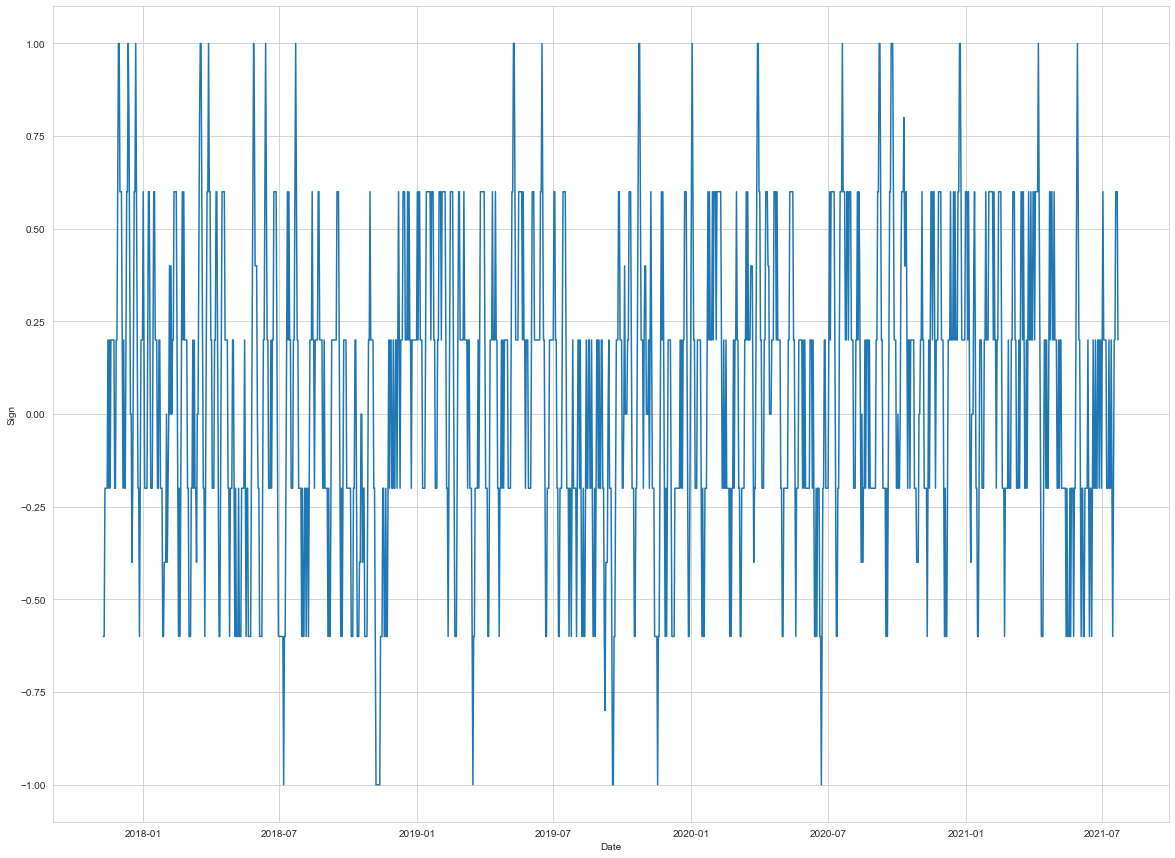

In [28]:
plt.figure(figsize=(20,15))
sns.lineplot(x = binance_df['Date'], y = trend)

In [29]:
binance_df['Trend'] = trend

In [30]:
binance_df['Trend']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1352   -0.2
1353   -0.2
1354   -0.2
1355   -0.6
1356   -0.6
Name: Trend, Length: 1357, dtype: float64

<AxesSubplot:>

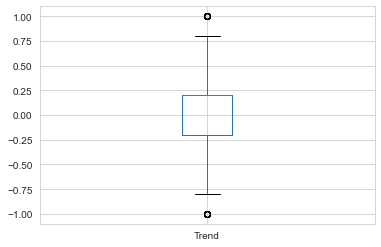

In [31]:
#The spread of the trend
binance_df['Trend'].plot(kind = 'box')

In [32]:
# We'll use the past day volume as a feature to predict the binance coin prices. To extract this feature, we'll use a for loop
u_vol = []
for i in range(len(binance_df)):
    if i==0:
        u_vol.append(np.nan)
    else:
        u_vol.append(binance_df['Volume'].iloc[i-1])

In [33]:
binance_df['PastDay_Volume'] = u_vol

In [34]:
binance_df.head()

,Date,Price(in dollars),Open,High,Low,Change%,Volume,5D_Avg,10D_Avg,Sign,Trend,PastDay_Volume
0,2021-07-27,303.29,304.31,307.62,298.53,-0.33,2260000.0,NaN,NaN,-1.0,NaN,NaN
1,2021-07-26,304.31,302.60,327.62,301.19,0.58,2860000.0,NaN,NaN,1.0,NaN,2260000.0
2,2021-07-25,302.57,302.55,303.09,292.85,-0.19,1250000.0,NaN,NaN,-1.0,NaN,2860000.0
3,2021-07-24,303.15,298.91,305.01,296.16,1.42,1810000.0,NaN,NaN,1.0,NaN,1250000.0
4,2021-07-23,298.89,293.51,301.15,281.68,1.83,1980000.0,NaN,NaN,1.0,NaN,1810000.0


Let's check for a relationship between the time of the year and the volume and price

<AxesSubplot:xlabel='Date', ylabel='Volume'>

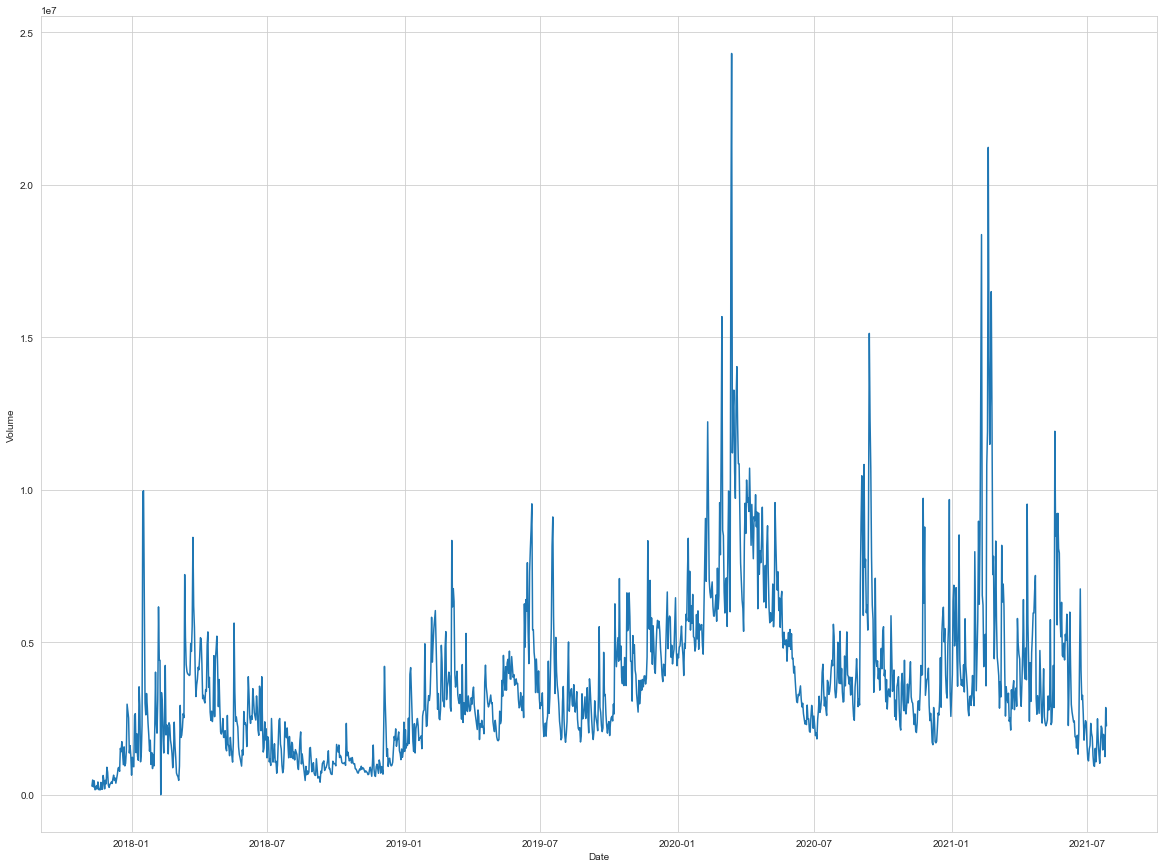

In [35]:
plt.figure(figsize = (20,15))
sns.lineplot(x = binance_df['Date'], y = binance_df['Volume'])

<AxesSubplot:xlabel='Date', ylabel='Price(in dollars)'>

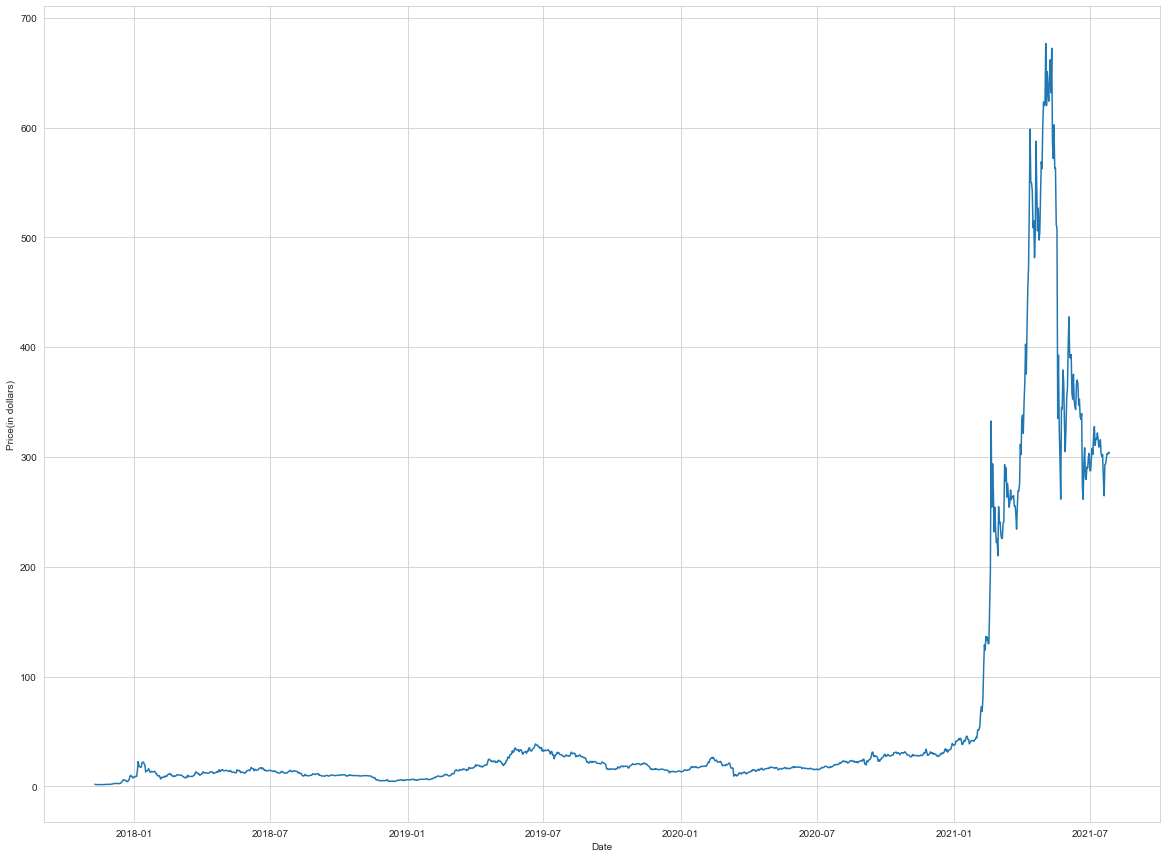

In [36]:
plt.figure(figsize = (20,15))
sns.lineplot(x = binance_df['Date'], y = binance_df['Price(in dollars)'])

Since there seems to be a significant change in volume in the first few months of every year, let's use that in our forecasting model. 

In [37]:
Month = binance_df['Date'].apply(lambda x: x.month)
Month

0        7
1        7
2        7
3        7
4        7
        ..
1352    11
1353    11
1354    11
1355    11
1356    11
Name: Date, Length: 1357, dtype: int64

In [38]:
binance_df['Month'] = Month
binance_df.head()

,Date,Price(in dollars),Open,High,Low,Change%,Volume,5D_Avg,10D_Avg,Sign,Trend,PastDay_Volume,Month
0,2021-07-27,303.29,304.31,307.62,298.53,-0.33,2260000.0,NaN,NaN,-1.0,NaN,NaN,7
1,2021-07-26,304.31,302.60,327.62,301.19,0.58,2860000.0,NaN,NaN,1.0,NaN,2260000.0,7
2,2021-07-25,302.57,302.55,303.09,292.85,-0.19,1250000.0,NaN,NaN,-1.0,NaN,2860000.0,7
3,2021-07-24,303.15,298.91,305.01,296.16,1.42,1810000.0,NaN,NaN,1.0,NaN,1250000.0,7
4,2021-07-23,298.89,293.51,301.15,281.68,1.83,1980000.0,NaN,NaN,1.0,NaN,1810000.0,7


In [39]:
binance = binance_df.copy()

In [40]:
binance = pd.get_dummies(data = binance, columns = ['Month'], drop_first=True)

In [41]:
binance.columns

Index(['Date', 'Price(in dollars)', 'Open', 'High', 'Low', 'Change%', 'Volume',
       '5D_Avg', '10D_Avg', 'Sign', 'Trend', 'PastDay_Volume', 'Month_2',
       'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8',
       'Month_9', 'Month_10', 'Month_11', 'Month_12'],
      dtype='object')

### Exploratory Data Analysis

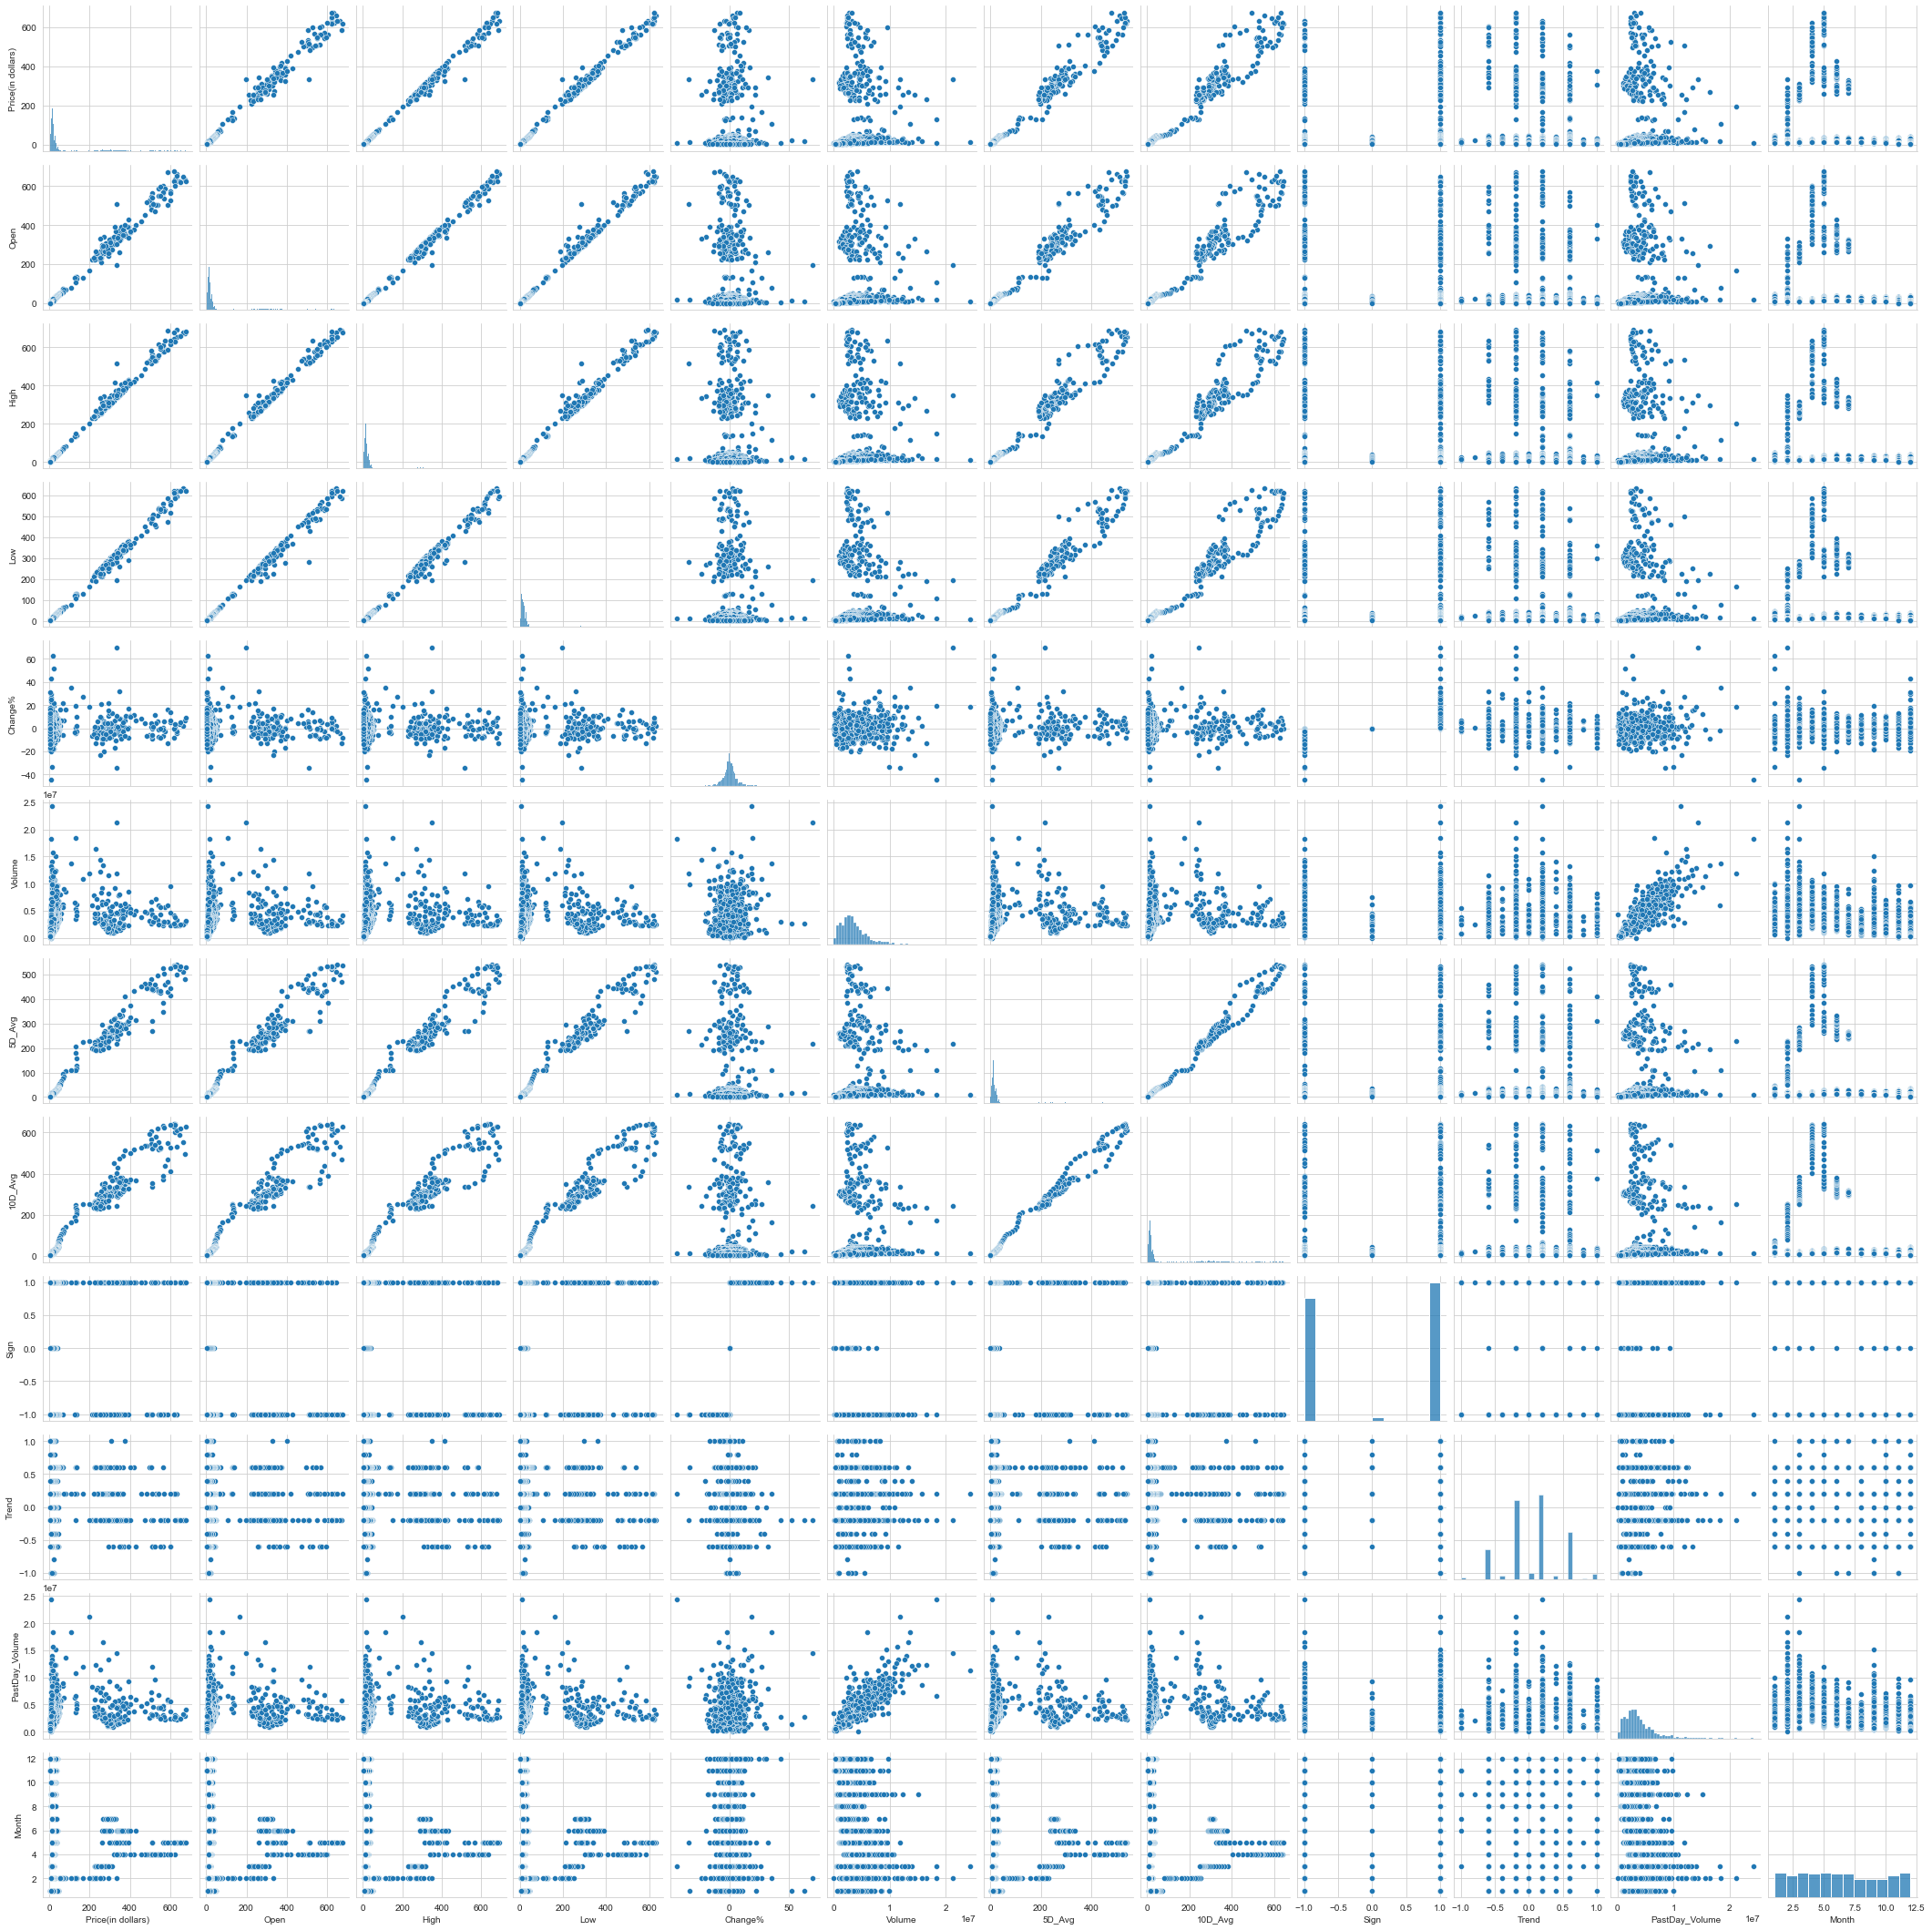

In [42]:
# A pairplot plots the pairwise relationships in a dataset. Below is a pairplot for the binance coin dataset
sns.pairplot(data = binance_df)

<AxesSubplot:xlabel='Date', ylabel='Sign'>

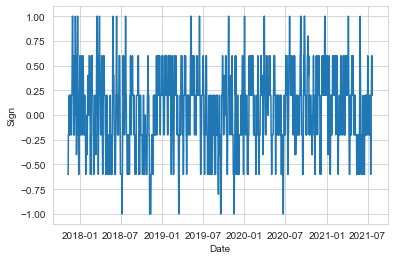

In [43]:
#  A line plot of the date vs the trend for the past few days
sns.lineplot(x = binance_df['Date'], y = trend)

<AxesSubplot:>

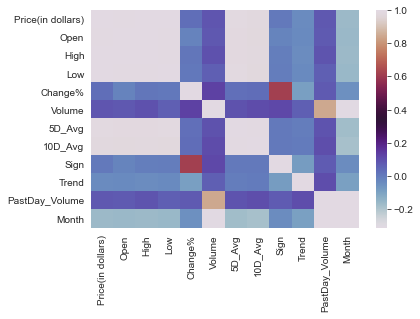

In [44]:
# A heatmap to help us visualise the correlation between different columns of the dataset
sns.heatmap(binance_df.corr(), cmap = 'twilight')

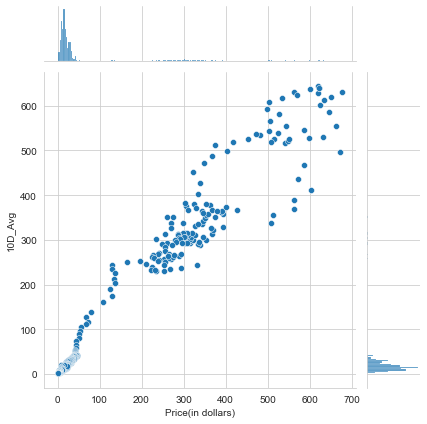

In [45]:
#  We'll use a jointplot to get a plot of two variables with bivariate and univariate graphs
sns.jointplot(data = binance_df, x = 'Price(in dollars)', y = '10D_Avg')

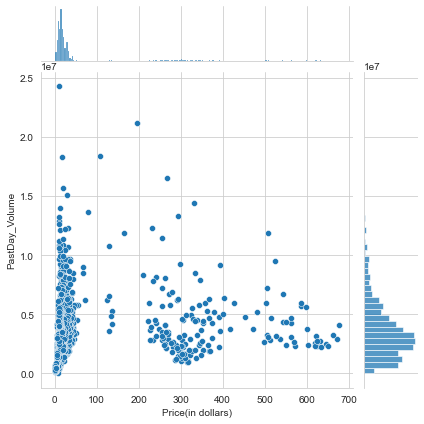

In [46]:
sns.jointplot(data = binance_df, x = 'Price(in dollars)', y = 'PastDay_Volume')

<AxesSubplot:xlabel='Date', ylabel='Price(in dollars)'>

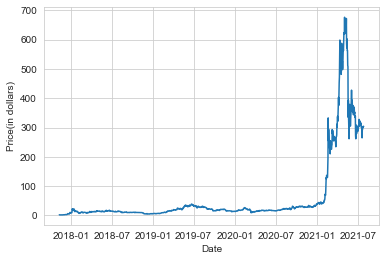

In [47]:
# This graph depicts the prices of binance coin through the years
sns.lineplot(data = binance_df, x = 'Date', y = 'Price(in dollars)')

<AxesSubplot:xlabel='Date', ylabel='Volume'>

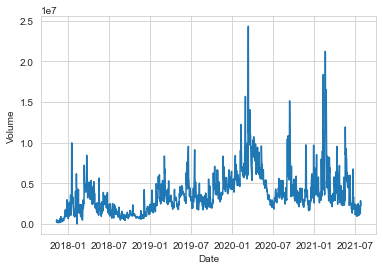

In [48]:
# # This graph depicts the volume of binance coin traded through the years
sns.lineplot(data = binance_df, x = 'Date', y = 'Volume')

We've finished feature engineering and the exploratory data analysis. So now its time to work on our model.

In [49]:
# Let's start by importing our scaler. We'll use the MinMaxScaler for all of our models.
from sklearn.preprocessing import MinMaxScaler

In [50]:
scaler = MinMaxScaler()

### Linear Regression using the 10 Day Average

In [51]:
X = binance_df[['Trend', '10D_Avg','PastDay_Volume']].dropna()
y = binance_df['Price(in dollars)'][10:]

In [52]:
# To divide our data into train and test day, we'll use train_test_split from sklearn.
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

In [54]:
X_train = scaler.fit_transform(X_train)

In [55]:
# Since this is a linear regression model, we'll have to import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

In [56]:
model = LinearRegression()

In [57]:
model.fit(X_train, y_train)

LinearRegression()

In [58]:
X_test = scaler.transform(X_test)

In [59]:
pred = model.predict(X_test)

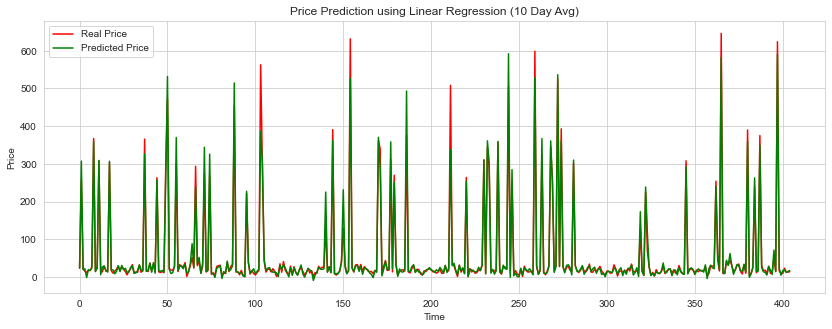

In [60]:
# This is a plot of the true values vs the predicted values
plt.figure(figsize=(14,5))
plt.plot(np.array(y_test), color = 'red', label = 'Real Price')
plt.plot(pred, color = 'green', label = 'Predicted Price')
plt.title('Price Prediction using Linear Regression (10 Day Avg)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

#### Let's evaluate our model using r2_score (accuracy), Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, and Mean Absolute Percentage Error

In [61]:
from sklearn.metrics import r2_score

In [62]:
r2 = r2_score(y_test, pred)

In [63]:
r2

0.9670273409674721

In [64]:
model.coef_

array([-25.97710983, 633.02371121,  -9.54875141])

In [65]:
coefficients= {'Feature' : ['Trend', '10D_Avg','PastDay_Volume'], 'Effect': [-25.97710983, 633.02371121,  -9.54875141]}

In [66]:
pd.DataFrame(coefficients)

,Feature,Effect
0,Trend,-25.977110
1,10D_Avg,633.023711
2,PastDay_Volume,-9.548751


In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [68]:
MAE = mean_absolute_error(y_test, pred)
MSE = mean_squared_error(y_test, pred)
RMSE = MSE**0.5
MAPE = mean_absolute_percentage_error(y_test, pred)

In [69]:
met = {'Metric':['MAE', 'MSE', 'RMSE','MAPE', 'R2_SCORE'], 'Value': [MAE, MSE, RMSE, MAPE, r2]}

In [70]:
pd.DataFrame(met)

,Metric,Value
0,MAE,8.789373
1,MSE,442.362294
2,RMSE,21.032411
3,MAPE,0.314847
4,R2_SCORE,0.967027


Let's try the same thing but with a 5 Day Moving Average instead of 10. <br> <br>
### Linear Regression Using a 5 Day Average

In [71]:
X = binance_df[['Trend', '5D_Avg','PastDay_Volume']].dropna()
y = binance_df['Price(in dollars)'][5:]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)
X_train = scaler.fit_transform(X_train)
model_5D = LinearRegression()

In [73]:
scaler_5D = MinMaxScaler()

In [74]:
X_train = scaler_5D.fit_transform(X_train)

In [75]:
model_5D.fit(X_train, y_train)
pred_5D = model_5D.predict(scaler.transform(X_test))

#### Evaluating our model

In [76]:
r2_5D = r2_score(y_test, pred_5D)

In [77]:
MAE_5D = mean_absolute_error(y_test, pred_5D)
MSE_5D = mean_squared_error(y_test, pred_5D)
RMSE_5D = MSE_5D**0.5
MAPE_5D = mean_absolute_percentage_error(y_test, pred_5D)

In [78]:
met_5D = {'Metric':['MAE', 'MSE', 'RMSE','MAPE', 'R2_SCORE'], 'Value': [MAE_5D, MSE_5D, RMSE_5D, MAPE_5D, r2_5D]}

In [79]:
pd.DataFrame(met_5D)

,Metric,Value
0,MAE,5.917629
1,MSE,175.078805
2,RMSE,13.231735
3,MAPE,0.215467
4,R2_SCORE,0.986917


In [80]:
model_5D.coef_

array([-19.68535477, 638.6190305 ,  -2.20235939])

In [81]:
coefficients_5D = {'Feature' : ['Trend', '5D_Avg','PastDay_Volume'], 'Effect': [-19.68535477, 638.6190305 ,  -2.20235939]}

In [82]:
pd.DataFrame(coefficients_5D)

,Feature,Effect
0,Trend,-19.685355
1,5D_Avg,638.619031
2,PastDay_Volume,-2.202359


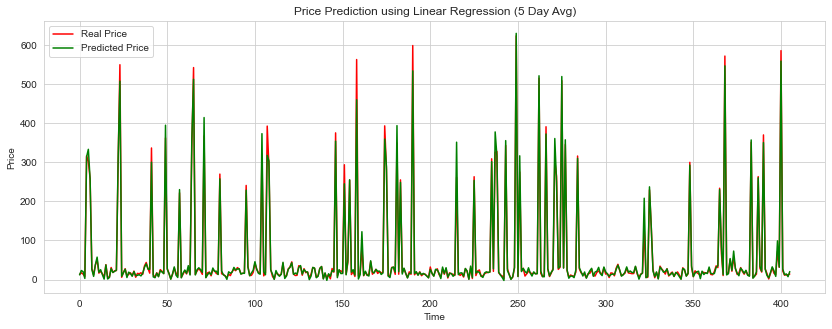

In [83]:
plt.figure(figsize=(14,5))
plt.plot(np.array(y_test), color = 'red', label = 'Real Price')
plt.plot(pred_5D, color = 'green', label = 'Predicted Price')
plt.title('Price Prediction using Linear Regression (5 Day Avg)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

#### Clearly, the model that used the 5 Day average instead of 10 Day average performed better.

Now, let's try using decision trees with the months as categorical variables.

### Decision Trees Using the Month Column

In [84]:
binance.columns

Index(['Date', 'Price(in dollars)', 'Open', 'High', 'Low', 'Change%', 'Volume',
       '5D_Avg', '10D_Avg', 'Sign', 'Trend', 'PastDay_Volume', 'Month_2',
       'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8',
       'Month_9', 'Month_10', 'Month_11', 'Month_12'],
      dtype='object')

In [85]:
X = binance[['5D_Avg', 'Trend', 'PastDay_Volume',  'Month_2', 'Month_3', 'Month_4',
       'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10',
       'Month_11', 'Month_12']].dropna()
y = binance['Price(in dollars)'][5:]

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [87]:
X_train = scaler.fit_transform(X_train)

In [88]:
X_test = scaler.transform(X_test)

In [89]:
from sklearn.tree import DecisionTreeRegressor

In [90]:
dtree = DecisionTreeRegressor()

In [91]:
dtree.fit(X_train, y_train)

DecisionTreeRegressor()

In [92]:
dtree_pred = dtree.predict(X_test)

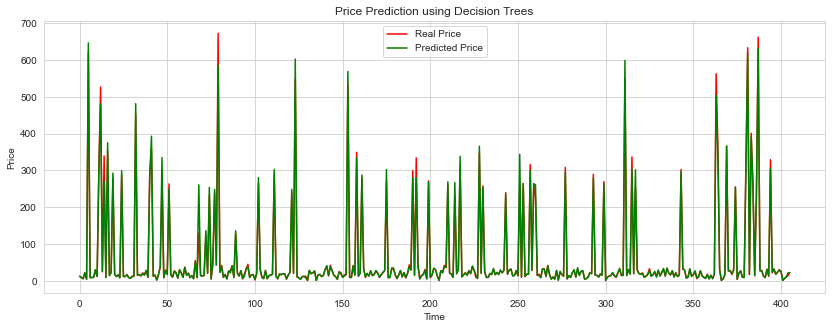

In [93]:
plt.figure(figsize=(14,5))
plt.plot(np.array(y_test), color = 'red', label = 'Real Price')
plt.plot(dtree_pred, color = 'green', label = 'Predicted Price')
plt.title('Price Prediction using Decision Trees')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

#### Let's evaluate our model

In [94]:
dtree_r2 = r2_score(y_test, dtree_pred)

In [95]:
DMAE = mean_absolute_error(y_test, dtree_pred)
DMSE = mean_squared_error(y_test, dtree_pred)
DRMSE = DMSE**0.5
DMAPE = mean_absolute_percentage_error(y_test, dtree_pred)

In [96]:
dmet = {'Metric':['MAE', 'MSE', 'RMSE','MAPE', 'R2_SCORE'], 'Value': [DMAE, DMSE, DRMSE, DMAPE, dtree_r2]}

In [97]:
pd.DataFrame(dmet)

,Metric,Value
0,MAE,4.526084
1,MSE,180.370304
2,RMSE,13.430201
3,MAPE,0.064622
4,R2_SCORE,0.987448


In [98]:
pd.DataFrame(met)

,Metric,Value
0,MAE,8.789373
1,MSE,442.362294
2,RMSE,21.032411
3,MAPE,0.314847
4,R2_SCORE,0.967027


In [99]:
pd.DataFrame(met_5D)

,Metric,Value
0,MAE,5.917629
1,MSE,175.078805
2,RMSE,13.231735
3,MAPE,0.215467
4,R2_SCORE,0.986917


### On the basis of R2 Scores, the Decision Tree Model perfomed the best, only marginally better than the Linear Regression Model that used 5 Day Moving Averages